[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mktmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.474036850921273
              precision    recall  f1-score   support

           0       0.48      0.43      0.45      1504
           1       0.47      0.52      0.49      1481

    accuracy                           0.47      2985
   macro avg       0.47      0.47      0.47      2985
weighted avg       0.47      0.47      0.47      2985



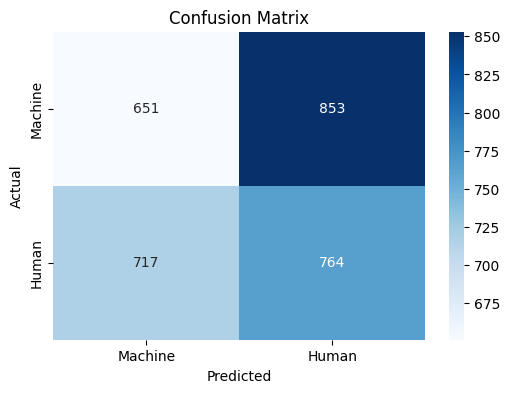

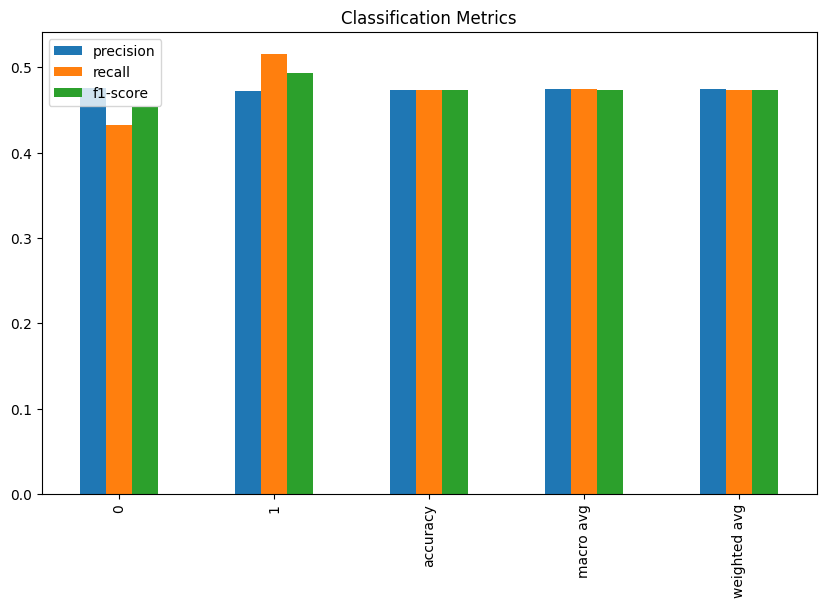

In [1]:
# Import libraries
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pickle
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Download stopwords from nltk
nltk.download('stopwords')

# Load dataset
# Try loading the file with tab delimiter
df = pd.read_csv(r'C:\Users\mktmi\Documents\ironhack\AI_Engineering\Work\Week4\project-3-nlp\TRAINING_DATA.txt', delimiter='\t', header=None, names=['label', 'text'])

# Check and clean dataset
df.dropna(subset=['text', 'label'], inplace=True)

# Preprocess text (lowercasing, removing punctuation, and stopwords)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    stop_words = set(stopwords.words('spanish'))  # Assuming Spanish text
    return ' '.join([word for word in text.split() if word not in stop_words])

df['cleaned_text'] = df['text'].apply(preprocess_text)

# Vectorize text using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['cleaned_text'])
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

""" Save the model and vectorizer
with open('nlp_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f) """

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Machine', 'Human'], yticklabels=['Machine', 'Human'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot the classification report
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Metrics')
plt.show()





In [2]:
# Display a few actual vs predicted examples
for i in range(5):
    print(f"Text: {df['text'].iloc[i]}")
    print(f"Actual Label: {y_test.iloc[i]} | Predicted Label: {y_pred[i]}")
    print("-" * 50)


Text: Cuando conocí a Janice en 2013 , una familia necesitaba 600 puntos , en promedio , para ser asignada a un apartamento del ayuntamiento de Camden .
Actual Label: 0 | Predicted Label: 1
--------------------------------------------------
Text: Hwang habló en Sur de este año por Southwest Music and Media Conference sobre el tema de " videos caseros-lanzallamas " en YouTube .
Actual Label: 0 | Predicted Label: 1
--------------------------------------------------
Text: Usted podría pensar Katy Perry y Robert Pattinson reencontrándose en Coachella es una gran noticia , ¡ hasta que es coronado por quién se toparon !
Actual Label: 0 | Predicted Label: 0
--------------------------------------------------
Text: Cualquiera que haya volado los cielos del creador ha escuchado todo el acto del prevuelo con la información de seguridad hasta ahora , pero esta empleada ha volteado el guión un poco !
Actual Label: 1 | Predicted Label: 1
--------------------------------------------------
Text: Bueno